In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your local system


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mortezacham101","key":"c7e33e5a8c89f567b04d2b22ef99f7bd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle (2).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Permissions to read the file


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle (2).json ~/.kaggle/'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rgbnihal/c2a-dataset


Dataset URL: https://www.kaggle.com/datasets/rgbnihal/c2a-dataset
License(s): MIT
100% 4.56G/4.57G [03:59<00:00, 26.8MB/s]
100% 4.57G/4.57G [03:59<00:00, 20.5MB/s]


In [ ]:
!unzip c2a-dataset.zip -d /content/C2A-dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0188_3.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0188_4.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0189_0.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0189_1.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0189_2.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0189_3.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0189_4.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0190_0.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0190_3.txt  
  inflating: /content/C2A-dataset/new_dataset3/train/labels/traffic_incident_image0191_0.txt  

In [ ]:

!pip install tensorflow keras opencv-python scikit-learn matplotlib
!pip install albumentations


In [ ]:
!pip install tensorflow keras numpy matplotlib opencv-python scikit-learn

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os


In [ ]:
!pip install tensorflow-object-detection-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

Number of training images: 6129
Sample training image file: collapsed_building_image0438_0.png


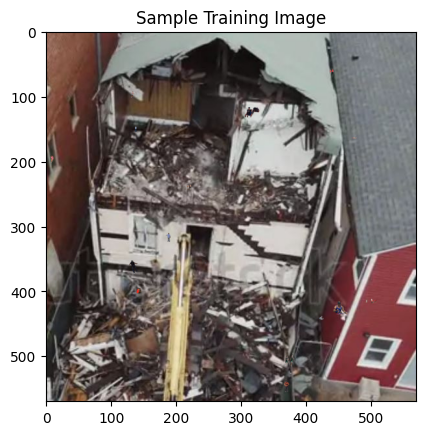

In [ ]:
# Define dataset paths
path = '/content/C2A-dataset/'
train_images_dir = path + 'new_dataset3/train/images/'
val_images_dir =  path + 'new_dataset3/val/images/'
test_images_dir =  path + 'new_dataset3/test/images/'

train_labels_dir = path +  'new_dataset3/train/labels/'
val_labels_dir = path +  'new_dataset3/val/labels/'
test_labels_dir =  path + 'new_dataset3/test/labels/'

# List some files to get an idea of the dataset
train_image_files = os.listdir(train_images_dir)
print(f"Number of training images: {len(train_image_files)}")
print(f"Sample training image file: {train_image_files[0]}")

# Load a sample image
sample_image_path = os.path.join(train_images_dir, train_image_files[0])
sample_image = cv2.imread(sample_image_path)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Sample Training Image")
plt.show()



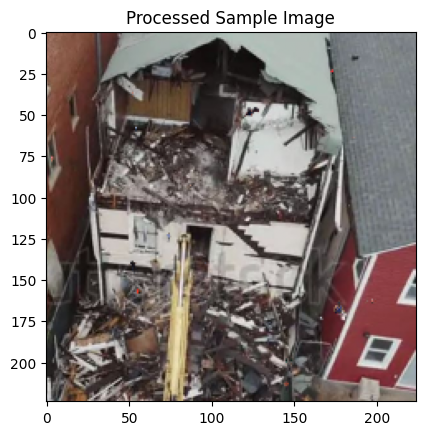

Annotations: [{'class': 0, 'bbox': [0.77193, 0.109649, 0.010526, 0.015789], 'pose': None}, {'class': 0, 'bbox': [0.261404, 0.752632, 0.003509, 0.010526], 'pose': None}, {'class': 0, 'bbox': [0.744737, 0.775439, 0.012281, 0.010526], 'pose': None}, {'class': 0, 'bbox': [0.242105, 0.264912, 0.007018, 0.017544], 'pose': None}, {'class': 0, 'bbox': [0.795614, 0.748246, 0.040351, 0.036842], 'pose': None}, {'class': 0, 'bbox': [0.557018, 0.219298, 0.040351, 0.02807], 'pose': None}, {'class': 0, 'bbox': [0.158772, 0.733333, 0.001754, 0.003509], 'pose': None}, {'class': 0, 'bbox': [0.386842, 0.422807, 0.012281, 0.017544], 'pose': None}, {'class': 0, 'bbox': [0.927193, 0.277193, 0.001754, 0.007018], 'pose': None}, {'class': 0, 'bbox': [0.016667, 0.346491, 0.008772, 0.022807], 'pose': None}, {'class': 0, 'bbox': [0.635965, 0.959649, 0.04386, 0.035088], 'pose': None}, {'class': 0, 'bbox': [0.521053, 0.747368, 0.003509, 0.003509], 'pose': None}, {'class': 0, 'bbox': [0.880702, 0.729825, 0.035088, 0

In [ ]:
def load_and_preprocess_image(image_path, label_path, target_size=(224, 224)):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)

    # Normalize image
    image = image / 255.0

    # Load labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Parse labels (dummy function, adjust as needed)
    annotations = []
    for label in labels:
        parts = label.strip().split()
        if len(parts) >= 5:
            cls, x_center, y_center, width, height, *pose = map(float, parts)
            annotations.append({
                'class': int(cls),
                'bbox': [x_center, y_center, width, height],
                'pose': int(pose[0]) if pose else None
            })

    return image, annotations

# Test preprocessing
sample_label_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[0])[0] + '.txt')
processed_image, annotations = load_and_preprocess_image(sample_image_path, sample_label_path)
plt.imshow(processed_image)
plt.title("Processed Sample Image")
plt.show()
print(f"Annotations: {annotations}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


max_objects = 10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(max_objects * 5)  # Output shape: (batch_size, max_objects * 5)
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss function as needed



In [ ]:
import tensorflow as tf

# Debugging output
def custom_loss(y_true, y_pred):

    y_true = tf.reshape(y_true, tf.shape(y_pred))
    return tf.reduce_mean(tf.square(y_true - y_pred))

model.compile(optimizer='adam', loss=custom_loss)

In [ ]:
class CustomDataGenerator(Sequence):
    def __init__(self, image_dir, label_dir, batch_size=32, target_size=(224, 224), max_objects=10, shuffle=True):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.batch_size = batch_size
        self.target_size = target_size
        self.max_objects = max_objects
        self.shuffle = shuffle
        self.image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        batch_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = np.zeros((self.batch_size, self.max_objects * 5))  # Flattened labels

        for i, filename in enumerate(batch_filenames):
            image_path = os.path.join(self.image_dir, filename)
            label_path = os.path.join(self.label_dir, os.path.splitext(filename)[0] + '.txt')
            image, label = load_and_preprocess_image(image_path, label_path)
            images.append(image)

            # Flatten and pad labels
            label_array = self.process_labels(label)
            labels[i, :len(label_array)] = label_array

        images = np.array(images)

        return images, labels

    def process_labels(self, labels):
        # Convert list of label dicts to a flattened numpy array with shape (max_objects * 5)
        label_array = np.zeros(self.max_objects * 5)
        for i, lbl in enumerate(labels):
            if i >= self.max_objects:
                break
            label_array[i * 5:(i + 1) * 5] = [lbl['class']] + lbl['bbox']
        return label_array

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_filenames)

# Create custom generators
train_generator = CustomDataGenerator(
    image_dir= path + 'new_dataset3/train/images/',
    label_dir= path + 'new_dataset3/train/labels/',
    batch_size=32,
    target_size=(224, 224)
)

val_generator = CustomDataGenerator(
    image_dir= path + 'new_dataset3/val/images/',
    label_dir= path + 'new_dataset3/val/labels/',
    batch_size=32,
    target_size=(224, 224),
    shuffle=False
)


In [ ]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - loss: 32.5056 - val_loss: 0.1223
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - loss: 0.1189 - val_loss: 0.1065
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 614s 3s/step - loss: 0.1028 - val_loss: 0.0901
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - loss: 0.0867 - val_loss: 0.0752
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - loss: 0.0727 - val_loss: 0.0629
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - loss: 0.0606 - val_loss: 0.0532
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - loss: 0.0516 - val_loss: 0.0460
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - loss: 0.0445 - val_loss: 0.0409
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - loss: 0.0402 - val_loss: 0.0373
Epoch 10/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - loss: 0.0371 - val_loss: 0.0350


In [ ]:
# Evaluate the model on validation data
val_loss = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0350
Validation Loss: 0.03504190221428871


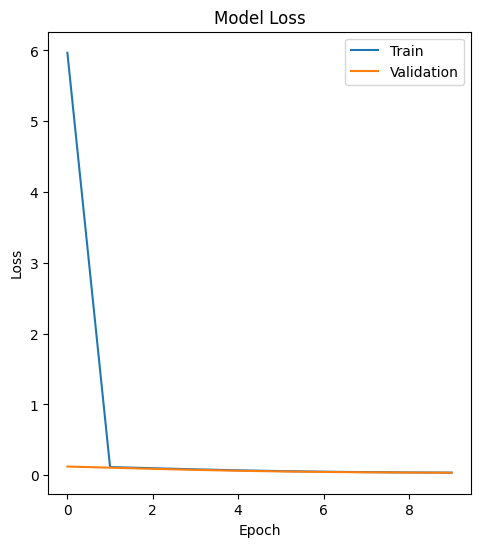

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
